In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Acer/Desktop/IFS Data/ifs_data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Company Code,Service Work Order Number,Customer Name,Location Address 1,Location Address 2,ZIP Code,Customer Phone Number,Reported Date/Time,Planned Start Date/Time,Actual Start Date/Time,...,Solution Statement,Service Technician,Office Support Contact,Currency,Order Amount,Contract Discount,Service tax Amount,Bill No,Bill Date/Time,Service Contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27T09:03:56,2018-09-28T09:58:23,2018-09-28T09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027,103,92,IFS-100002,2018-10-04T12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27T07:16:17,2018-09-28T09:59:16,2018-09-28T09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898,290,261,IFS-100003,2018-10-02T09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27T08:40:41,2018-09-28T10:04:22,2018-09-28T10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388,139,125,IFS-100004,2018-10-02T13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27T08:33:28,2018-09-28T10:12:44,2018-09-28T10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746,75,67,IFS-100005,2018-10-04T10:15:10,418


In [4]:
df.shape

(20000, 25)

In [5]:
# change the column names
df.rename(index=str, columns={'Company Code': 'com_code' ,  'Bill No':'bill_no',
                              'Customer Name' : 'cust_name' , 'Location Address 1' : 'loc_add',
                              'Location Address 2' : 'city' , 'ZIP Code' : 'zip_code',
                              'Customer Phone Number' : 'cust_phn_no' , 'Reported Date/Time' : 'report_dt',
                              'Planned Start Date/Time' : 'plan_strt_dt' , 'Actual Start Date/Time':'actual_strt_dt',
                              'Planned Finish Date/Time':'plan_fnsh_dt' , 'Actual Finish Date/Time':'actual_fnsh_dt',
                              'Order Description':'order_desc' , 'Asset/Equipment Details':'asset_req',
                              'Problem Statement':'prob_stmnt' , 'Solution Statement':'sol_stmnt',
                              'Service Technician':'serv_tech_head' , 'Office Support Contact':'office_phn_no',
                              'Currency':'currency' , 'Order Amount':'order_amt',
                              'Contract Discount':'contract_disc' , 'Service tax Amount':'serv_tax_amt',
                              'Bill Date/Time':'bill_dt' , 'Service Contract':'serv_contract'}, inplace=True)

In [6]:
df.head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27T09:03:56,2018-09-28T09:58:23,2018-09-28T09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027,103,92,IFS-100002,2018-10-04T12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27T07:16:17,2018-09-28T09:59:16,2018-09-28T09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898,290,261,IFS-100003,2018-10-02T09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27T08:40:41,2018-09-28T10:04:22,2018-09-28T10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388,139,125,IFS-100004,2018-10-02T13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27T08:33:28,2018-09-28T10:12:44,2018-09-28T10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746,75,67,IFS-100005,2018-10-04T10:15:10,418


## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null object
plan_strt_dt                  20000 non-null object
actual_strt_dt                20000 non-null object
plan_fnsh_dt                  20000 non-null object
actual_fnsh_dt                20000 non-null object
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head                20000 non-null object
office_phn_n

## Check missing values for each column

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

serv_contract                 0
actual_fnsh_dt                0
Service Work Order Number     0
cust_name                     0
loc_add                       0
city                          0
zip_code                      0
cust_phn_no                   0
report_dt                     0
plan_strt_dt                  0
actual_strt_dt                0
plan_fnsh_dt                  0
order_desc                    0
bill_dt                       0
asset_req                     0
prob_stmnt                    0
sol_stmnt                     0
serv_tech_head                0
office_phn_no                 0
currency                      0
order_amt                     0
contract_disc                 0
serv_tax_amt                  0
bill_no                       0
com_code                      0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract


In [10]:
df['report_dt'] = pd.to_datetime(df['report_dt'])
df['plan_strt_dt'] = pd.to_datetime(df['plan_strt_dt'])
df['actual_strt_dt'] = pd.to_datetime(df['actual_strt_dt'])
df['plan_fnsh_dt'] = pd.to_datetime(df['plan_fnsh_dt'])
df['actual_fnsh_dt'] = pd.to_datetime(df['actual_fnsh_dt'])
df['bill_dt'] = pd.to_datetime(df['bill_dt'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null datetime64[ns]
plan_strt_dt                  20000 non-null datetime64[ns]
actual_strt_dt                20000 non-null datetime64[ns]
plan_fnsh_dt                  20000 non-null datetime64[ns]
actual_fnsh_dt                20000 non-null datetime64[ns]
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head          

In [12]:
df['order_amt'] = df['order_amt'].astype(np.float64)
df['contract_disc'] = df['contract_disc'].astype(np.float64)
df['serv_tax_amt'] = df['serv_tax_amt'].astype(np.float64)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null datetime64[ns]
plan_strt_dt                  20000 non-null datetime64[ns]
actual_strt_dt                20000 non-null datetime64[ns]
plan_fnsh_dt                  20000 non-null datetime64[ns]
actual_fnsh_dt                20000 non-null datetime64[ns]
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head          

In [14]:
df.head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-19 11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419.0,142.0,128.0,IFS-100001,2018-09-22 12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27 09:03:56,2018-09-28 09:58:23,2018-09-28 09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027.0,103.0,92.0,IFS-100002,2018-10-04 12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27 07:16:17,2018-09-28 09:59:16,2018-09-28 09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898.0,290.0,261.0,IFS-100003,2018-10-02 09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27 08:40:41,2018-09-28 10:04:22,2018-09-28 10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388.0,139.0,125.0,IFS-100004,2018-10-02 13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27 08:33:28,2018-09-28 10:12:44,2018-09-28 10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746.0,75.0,67.0,IFS-100005,2018-10-04 10:15:10,418


In [15]:
df_new = df

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null datetime64[ns]
plan_strt_dt                  20000 non-null datetime64[ns]
actual_strt_dt                20000 non-null datetime64[ns]
plan_fnsh_dt                  20000 non-null datetime64[ns]
actual_fnsh_dt                20000 non-null datetime64[ns]
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head          

In [17]:
df_new.describe().round(2)

,order_amt,contract_disc,serv_tax_amt,serv_contract
count,20000.00,20000.00,20000.00,20000.00
mean,1531.01,153.15,137.84,4761.10
std,852.70,85.27,76.74,2743.58
min,50.00,5.00,5.00,414.00
25%,794.00,79.00,72.00,2384.75
50%,1543.00,154.00,139.00,4517.50
75%,2266.00,227.00,204.00,6995.00
max,3000.00,300.00,270.00,10329.00


## Add the column -> bill_amt

In [18]:
df_new['bill_amt'] = df_new['order_amt'] - df_new['contract_disc'] + df_new['serv_tax_amt']

In [19]:
df['bill_amt'] = df['bill_amt'].astype(np.float64)

# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

In [20]:
df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count().head()

,serv_contract,city,bill_no
0,414,Sejwegca,1
1,415,Jipuri,3
2,416,Uhezufen,2
3,417,Heisla,3
4,418,Vijipab,3


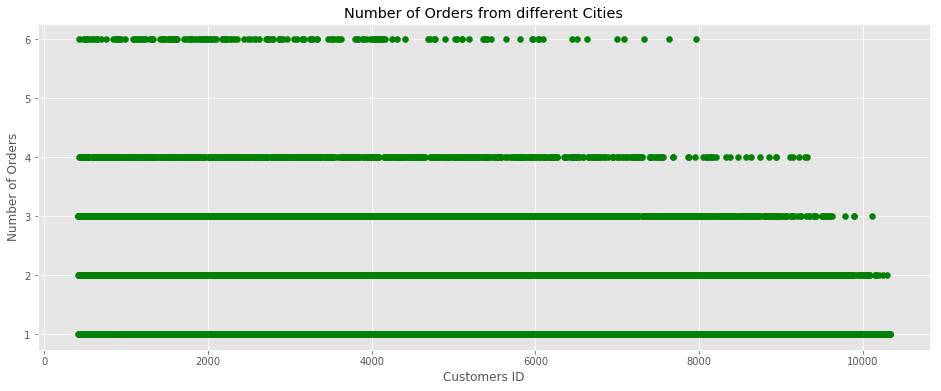

In [40]:
orders = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count()

style.use('ggplot')
plt.subplots(figsize=(16,6))
plt.scatter(orders.serv_contract,orders.bill_no, color='g')#, align='center')
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders from different Cities')
plt.show()

##  Check TOP 5 most number of orders

In [22]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='bill_no', ascending=False).head()

The TOP 5 customers with most number of orders...


,serv_contract,city,bill_no
573,987,Jatoozi,6
678,1092,Tuhoceto,6
1662,2076,Olugaedu,6
3046,3460,Muhlulat,6
1853,2267,Wutoel,6


## How much money spent by the customers?

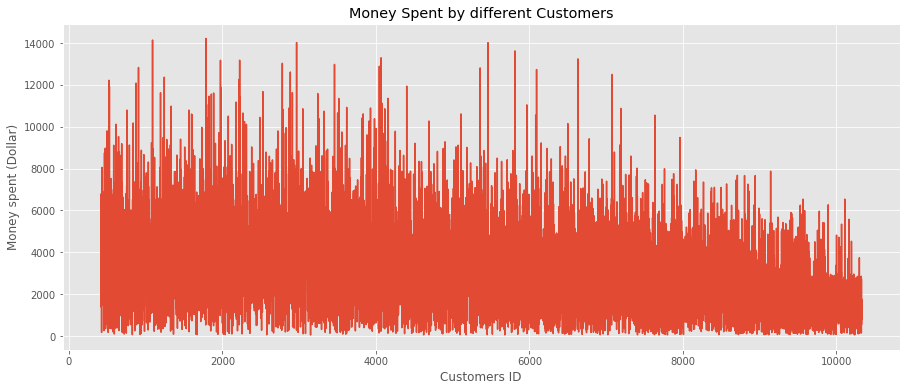

In [23]:
money_spent = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_amt'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.serv_contract, money_spent.bill_amt)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent by different Customers')
plt.show()

## Check TOP 5 highest money spent 


In [24]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='bill_amt', ascending=False).head()

The TOP 5 customers with highest money spent...


,serv_contract,city,bill_amt
1372,1786,Wizneev,14220.0
675,1089,Wukpeovu,14145.0
2552,2966,Keefom,14025.0
5046,5460,Dunonoc,14020.0
5397,5811,Zarublic,13625.0


# Discover patterns for Number of Orders

## How many orders (per month)?

In [25]:
df_new.insert(loc=8, column='year_month', value=df_new['report_dt'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=9, column='month', value=df_new.report_dt.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=10, column='day', value=(df_new.report_dt.dt.dayofweek)+1)
df_new.insert(loc=11, column='hour', value=df_new.report_dt.dt.hour)

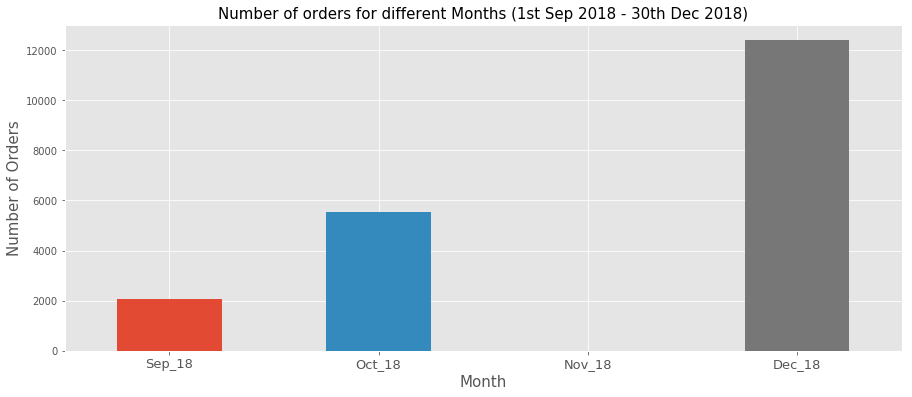

In [27]:
ax = df_new.groupby('bill_no')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Sep 2018 - 30th Dec 2018)',fontsize=15)
ax.set_xticklabels(('Sep_18','Oct_18','Nov_18','Dec_18'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [29]:
df_new.groupby('bill_no')['day'].unique().value_counts().sort_index()

[1]    3694
[2]    3414
[3]    3195
[4]    3663
[5]    1655
[6]    1049
[7]    3330
Name: day, dtype: int64

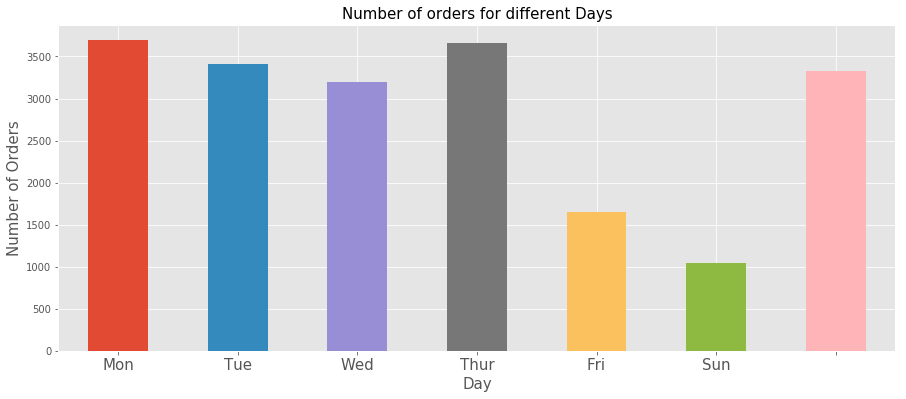

In [30]:
ax = df_new.groupby('bill_no')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [31]:
df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index()

[0]       94
[1]       44
[2]       31
[4]       51
[5]       67
[6]      216
[7]      654
[8]     1306
[9]     1700
[10]    1841
[11]    1882
[12]    1757
[13]    1703
[14]    1675
[15]    1624
[16]    1525
[17]    1076
[18]     878
[19]     580
[20]     444
[21]     380
[22]     256
[23]     185
Name: hour, dtype: int64

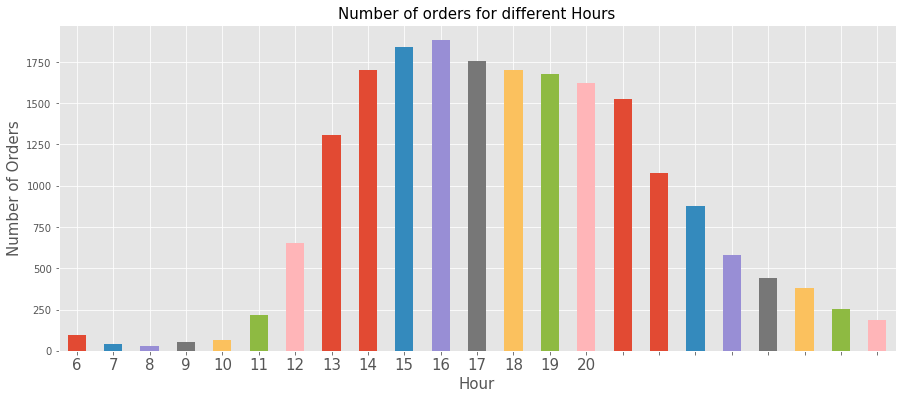

In [32]:
ax = df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for each City

In [33]:
df_new.head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,year_month,month,...,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract,bill_amt
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18 08:47:54,201809,9,...,Jack,877-586-3224,$-,1419.0,142.0,128.0,IFS-100001,2018-09-22 12:36:43,414,1405.0
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27 09:03:56,201809,9,...,John,877-586-3224,$-,1027.0,103.0,92.0,IFS-100002,2018-10-04 12:24:50,415,1016.0
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27 07:16:17,201809,9,...,John,877-586-3224,$-,2898.0,290.0,261.0,IFS-100003,2018-10-02 09:57:55,416,2869.0
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27 08:40:41,201809,9,...,Brad,877-586-3224,$-,1388.0,139.0,125.0,IFS-100004,2018-10-02 13:30:18,417,1374.0
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27 08:33:28,201809,9,...,Brad,877-586-3224,$-,746.0,75.0,67.0,IFS-100005,2018-10-04 10:15:10,418,738.0


## How much money spent by each city?

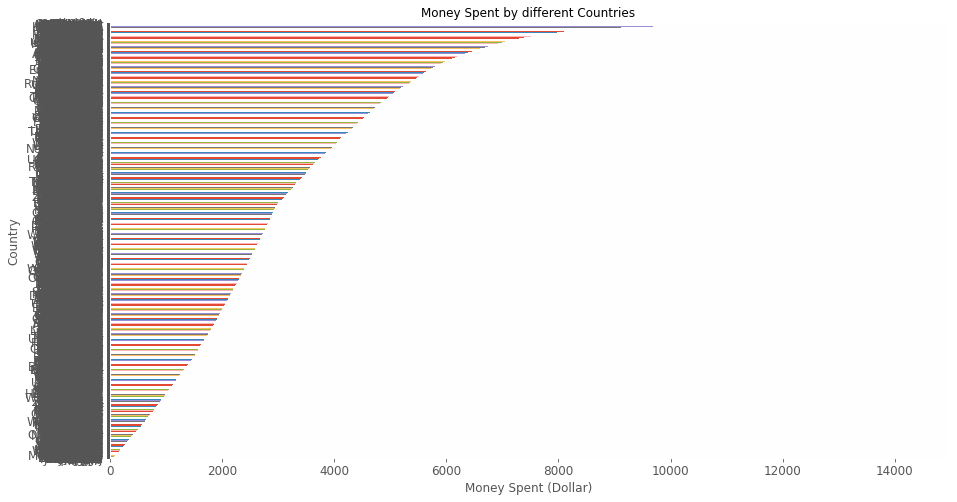

In [39]:
group_country_amount_spent = df_new.groupby('city')['bill_amt'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()